In [1]:
import scipy.linalg as lin
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rc('figure', figsize=(8, 5))

### Additional functions

In [3]:
def get_matrix(n):
    return np.matrix(np.zeros((n, n)))

# Task 1

## Matrix
### $
\begin{equation*}
A = \begin{pmatrix}
      0.63& -0.76& 1.34& 0.37\\
      0.54& 0.83& -0.74& -1.27\\ 
      0.24& -0.44& 0.35& 0.55\\
      0.43& -1.21& 2.32& -1.41\\
    \end{pmatrix}
\end{equation*}\\
b = \begin{pmatrix}1.21& 0.86& 0.25& 1.55\end{pmatrix}
$

In [4]:
A = np.matrix(
    [
        [0.63, -0.76, 1.34, 0.37], 
        [0.54, 0.83, -0.74, -1.27], 
        [0.24, -0.44, 0.35, 0.55], 
        [0.43, -1.21, 2.32, -1.41]
    ])
N = len(A)
b = np.array([1.21, 0.86, 0.25, 1.55])

## LU-decomposition

### scipy.linalg.lu

In [5]:
P, L, U = lin.lu(A)
print("P:")
print(P)
print("L:")
print(L)
print("U:")
print(U)

P:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]]
L:
[[ 1.          0.          0.          0.        ]
 [ 0.85714286  1.          0.          0.        ]
 [ 0.68253968 -0.46662381  1.          0.        ]
 [ 0.38095238 -0.10157506 -0.67215812  1.        ]]
U:
[[ 0.63       -0.76        1.34        0.37      ]
 [ 0.          1.48142857 -1.88857143 -1.58714286]
 [ 0.          0.          0.52414443 -2.40313833]
 [ 0.          0.          0.         -1.36745546]]


### Personal

In [6]:
def lu_decomposition(A):
    """Return LU-decomposition of the matrix 
    witout a permutation matrix
    """
    n = len(A)
    L = get_matrix(n)
    U = get_matrix(n)

    for i in range(n):
        L[i, 0] = A[i, 0]
        U[0, i] = A[0, i] / A[0, 0]    

    for i in range(1, n):
        for j in range(1, i + 1):   
            L[i, j] = A[i, j] \
                      - np.sum([L[i, k] * U[k, j] for k in range(j)])
        for j in range(i, n):
            U[i, j] = (A[i, j] \
                      - np.sum([L[i, k] * U[k, j] for k in range(i)])) \
                      / L[i, i]   
            
    return L, U

In [7]:
l, u = lu_decomposition(A)
print("L:")
print(l)
print("U:")
print(u)

L:
[[ 0.63        0.          0.          0.        ]
 [ 0.54        1.48142857  0.          0.        ]
 [ 0.24       -0.15047619 -0.35230794  0.        ]
 [ 0.43       -0.69126984  0.52414443 -2.03442524]]
U:
[[ 1.         -1.20634921  2.12698413  0.58730159]
 [ 0.          1.         -1.27483124 -1.07135969]
 [ 0.          0.          1.         -0.70345702]
 [ 0.          0.          0.          1.        ]]


#### Check

In [8]:
np.allclose(A, l @ u)

True

## Determinant

### det(A)

In [9]:
lin.det(A)

0.6689373300000001

### Using L and U matrices
### det(A) = det(LU) = det(L)det(U) = det(L) = $l_{11}l_{22}...l_{nn}$

In [10]:
np.prod(l.diagonal())

0.66893732999999989

# Task 2
## Solving systems of equations Ax=b

### scipy.linalg.solve

In [11]:
X = lin.solve(A, b)
print("X:", X)

X: [ 1.35057194  0.41781349  0.54581665 -0.1478821 ]


### Using L and U matrices
### scipy.linalg.lu_solve

In [12]:
X = lin.lu_solve(lin.lu_factor(A), b)
print("X:", X)

X: [ 1.35057194  0.41781349  0.54581665 -0.1478821 ]


### Personal
#### $A = LU\\
LUx = b\\
Ly = b\\
Ux = y$

In [13]:
def solve_lu(l, u, b):
    """Solve the equation system Ax=b, 
    given the LU factorization of A 
    """
    y = lin.solve_triangular(l, b, lower=True)
    x = lin.solve_triangular(u, y)
    return x

In [14]:
X = solve_lu(l, u, b)
print("X:", X)

X: [ 1.35057194  0.41781349  0.54581665 -0.1478821 ]


#### Check

In [15]:
np.allclose(A @ X, b)

True

## Inverse matrix $A^{-1}$

### A.I

In [16]:
print(A.I)

[[ 0.36094861  0.89587914  1.45948799 -0.14290576]
 [ 2.83577686 -0.29014377 -5.05779219 -0.96742246]
 [ 1.94349596 -0.50191398 -3.3528537  -0.34577679]
 [ 0.87434648 -0.30364429 -0.73128525 -0.49153932]]


### Personal
#### Solving the n-th number of systems
### $AZ^{(j)}=\delta^{(j)} j=\overline{1,n}\\
Z^{(j)} - the\:j^{th}\:column\:of\:the\:inverse\:matix\\
\delta^{(j)} - the\:j^{th}\:column\:of\:the\:ones\:matrix$

In [17]:
δ = np.eye(N)
δ

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [18]:
A_I = np.array([solve_lu(l, u, row) for row in δ]).T
print("A_I:")
print(A_I)

A_I:
[[ 0.36094861  0.89587914  1.45948799 -0.14290576]
 [ 2.83577686 -0.29014377 -5.05779219 -0.96742246]
 [ 1.94349596 -0.50191398 -3.3528537  -0.34577679]
 [ 0.87434648 -0.30364429 -0.73128525 -0.49153932]]


#### Check

In [19]:
np.allclose(A @ A_I, np.eye(N))

True

### Using L and U matrices
#### $A^{-1} = U^{-1}L^{-1}$

In [20]:
A_I_lu = u.I @ l.I
print("A_I:")
print(A_I_lu)

A_I:
[[ 0.36094861  0.89587914  1.45948799 -0.14290576]
 [ 2.83577686 -0.29014377 -5.05779219 -0.96742246]
 [ 1.94349596 -0.50191398 -3.3528537  -0.34577679]
 [ 0.87434648 -0.30364429 -0.73128525 -0.49153932]]


#### Check

In [21]:
np.allclose(A @ A_I_lu, np.eye(N))

True

# Taks 3
## Matrix
### $a_{ij} = \frac{321}{(1 + c)^6}\\
c = c_{ij} = 2.5\cdot i \cdot j$

In [22]:
def get_matrix_n(n):
    """Return a matrix of size n for task 3"""
    matrix = []

    for i in range(1, n + 1):
        matrix.append([])
        for j in range(1, n + 1):
            c = 2.5 * i * j
            a = 321 / (1+c)**6
            matrix[i - 1].append(a)
    return np.matrix(matrix)

## 2-norm

In [23]:
def get_norm(matrix, n=2):
    """Return matrix norm"""
    return np.power(np.abs(matrix), n).sum() ** (1/n)

def get_norms(matrixes, n=2):
    """Return matrices norms"""
    return np.array([get_norm(matrix, n) for matrix in matrixes])

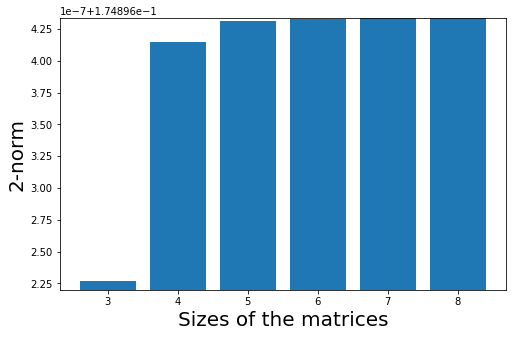

{3: 0.17489622711982294,
 4: 0.17489641492354047,
 5: 0.17489643100747154,
 6: 0.17489643310132316,
 7: 0.17489643346802827,
 8: 0.17489643354814818}

In [27]:
mtrx_sizes = range(3, 9)
norms_2 = get_norms([get_matrix_n(i) for i in mtrx_sizes])

plt.bar(mtrx_sizes, norms_2)
plt.ylim((0.17489622, 0.17489643354))
plt.xlabel("Sizes of the matrices", fontsize=20)
plt.ylabel("2-norm", fontsize=20)

plt.show()
{n: enorm for n, enorm in zip(mtrx_sizes, norms_2)}

## Condition number

In [25]:
def get_cond(matrix):
    """Return the conditional number of the matrix"""
    return get_norm(matrix) * get_norm(matrix.I)

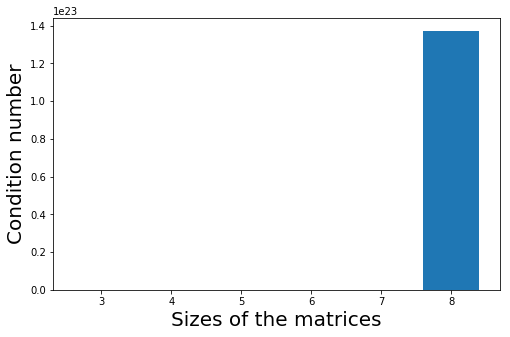

{3: 2765603.5370397782,
 4: 4024711234.849544,
 5: 7026429682566.2813,
 6: 15345194174582900.0,
 7: 4.1643785843410502e+19,
 8: 1.3723814737235859e+23}

In [28]:
conds = [get_cond(get_matrix_n(i)) for i in mtrx_sizes]

plt.bar(mtrx_sizes, conds)
plt.xlabel("Sizes of the matrices", fontsize=20)
plt.ylabel("Condition number", fontsize=20)

plt.show()
{n: cond for n, cond in zip(mtrx_sizes, conds)}